In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy.optimize import curve_fit

# RC un solo Capacitor

In [302]:
df = pd.read_csv("toma_de_datos_1_rc.csv", encoding ='latin-1') #Importar datos
print(df)

        Record Length           2500   Points  -24.99999851E-3   0.0  \
0     Sample Interval  19.9999995E-6        s         -0.02498  0.00   
1       Trigger Point    1.2500000E3  Samples         -0.02496  0.00   
2                 NaN            NaN      NaN         -0.02494  0.00   
3                 NaN            NaN      NaN         -0.02492  0.00   
4                 NaN            NaN      NaN         -0.02490  0.00   
...               ...            ...      ...              ...   ...   
2494              NaN            NaN      NaN          0.02490  3.56   
2495              NaN            NaN      NaN          0.02492  3.56   
2496              NaN            NaN      NaN          0.02494  3.52   
2497              NaN            NaN      NaN          0.02496  3.56   
2498              NaN            NaN      NaN          0.02498  3.52   

      Unnamed: 5  Record Length.1         2500.1 Points.1  -24.99999851E-3.1  \
0            NaN  Sample Interval  19.9999995E-6       

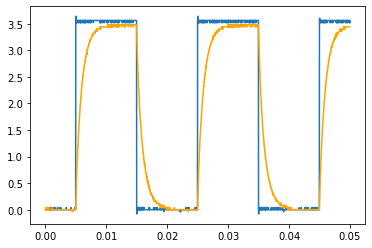

In [303]:
plt.plot(df['-24.99999851E-3']-df['-24.99999851E-3'][0] , df['0.0'])
plt.plot(df['-24.99999851E-3.1'] - df['-24.99999851E-3.1'][0] , df['0.0.1'], c='orange') #Centrar datos
tt = df['-24.99999851E-3']-df['-24.99999851E-3'][0] #Centrar t


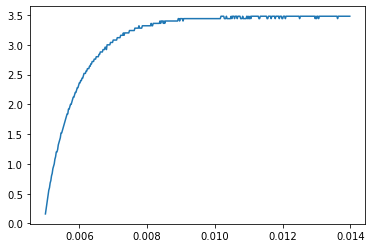

In [304]:
#Masking para obtener solo carga de capacitor
t = [tt[i] for i in range(len(tt)) if tt[i]>=0.005 and tt[i]<=0.014]
V = df['0.0.1'][250:700]
plt.plot(t, V)

In [305]:
def ajuste(t, A, b, T):
    return(A*(1. - np.exp(-(t)/T-b/T)))

In [306]:
res, cov = curve_fit(ajuste, t, V)

In [312]:
A, b, T = res[0], res[1], res[2]
print (T)
print(A)
print(b)

0.0009580145366406531
3.47183381773297
-0.004932779793168514


# Tau = 0.000958s, V(Tau)=3,47925 v

In [316]:
Vaj = []
for tt in t:
    Vaj.append(A*(1. - np.exp(-(tt)/T-b/T)))
    
Vc_T = A*(1. + np.exp(-1 + b/T))
print(Vc_T)

3.4792486094891806


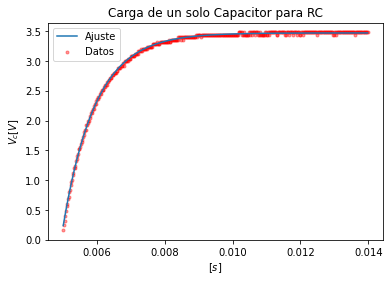

In [317]:
plt.title('Carga de un solo Capacitor para RC')
plt.xlabel(r'$[s]$')
plt.ylabel(r'$V_c[V]$')
plt.plot(t, Vaj, label = 'Ajuste')
plt.scatter(t, V, c = 'r', marker = '.', label = 'Datos', alpha = 0.4)
plt.legend()

# RC dos Capacitores

In [318]:
df = pd.read_csv("rc_2 _capacitores.csv", encoding ='latin-1') #Importar datos
print(df)

        Record Length           2500   Points  -24.99999851E-3   0.0  \
0     Sample Interval  19.9999995E-6        s         -0.02498  0.00   
1       Trigger Point    1.2500000E3  Samples         -0.02496  0.00   
2                 NaN            NaN      NaN         -0.02494  0.00   
3                 NaN            NaN      NaN         -0.02492  0.00   
4                 NaN            NaN      NaN         -0.02490  0.04   
...               ...            ...      ...              ...   ...   
2494              NaN            NaN      NaN          0.02490  3.56   
2495              NaN            NaN      NaN          0.02492  3.52   
2496              NaN            NaN      NaN          0.02494  3.56   
2497              NaN            NaN      NaN          0.02496  3.56   
2498              NaN            NaN      NaN          0.02498  3.56   

      Unnamed: 5  Record Length.1         2500.1 Points.1  -24.99999851E-3.1  \
0            NaN  Sample Interval  19.9999995E-6       

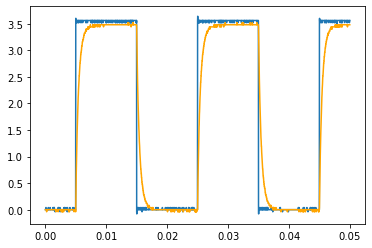

In [319]:
plt.plot(df['-24.99999851E-3']-df['-24.99999851E-3'][0] , df['0.0'])
plt.plot(df['-24.99999851E-3.1'] - df['-24.99999851E-3.1'][0] , df['0.0.1'], c='orange') #Centrar datos
tt = df['-24.99999851E-3']-df['-24.99999851E-3'][0] #Centrar t

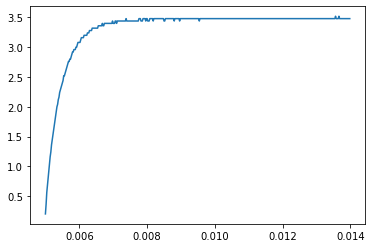

In [320]:
#Masking para obtener solo carga de capacitor
t = [tt[i] for i in range(len(tt)) if tt[i]>=0.005 and tt[i]<=0.014]
V = df['0.0.1'][250:700]
plt.plot(t, V)

In [321]:
res, cov = curve_fit(ajuste, t, V)

In [323]:
A, b, T = res[0], res[1], res[2]
print(T)
print(A)
Vc_T = A*(1. + np.exp(-1 + b/T))
print(Vc_T)

0.00046566789649715067
3.4751863122568567
3.4752167905127167


# Tau = 0.000466s, V(Tau) = 3.4752 v

In [296]:
Vaj = []
for tt in t:
    Vaj.append(A*(1. - np.exp(-(tt)/T-b/T)))

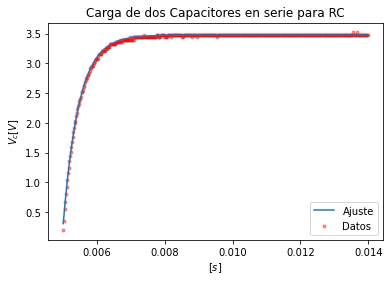

In [297]:
plt.title('Carga de dos Capacitores en serie para RC')
plt.xlabel(r'$[s]$')
plt.ylabel(r'$V_c[V]$')
plt.plot(t, Vaj, label = 'Ajuste')
plt.scatter(t, V, c = 'r', marker = '.', label = 'Datos', alpha = 0.4)
plt.legend()